# Research Methods - Assignment 1

- André Santos
- Luís Espírito Santo
- Miguel Guerreiro

In [ ]:
!pip -q install ipympl

In [ ]:
#%matplotlib widget
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import math

from matplotlib.animation import FuncAnimation, PillowWriter 
from matplotlib import cm

from mpl_toolkits import mplot3d
from google.colab import output
output.enable_custom_widget_manager()

## Read Data

In [ ]:
def read_data(filename):
  df = pd.read_csv(filename, index_col=0)
  df.describe()
  #Defining extra columns
  df["code"] = np.nan
  df["time"] = np.nan
  if "Time_code1" in df.columns:
    df = df.loc[df["Time_code1"] != 0]
    df["code"] = np.where(np.logical_not(df["Time_code1"].isnull()), "Code1", df["code"])
    df["time"] = np.where(df["code"] == "Code1", df["Time_code1"], df["time"])
  if "Time_code2" in df.columns:
    df = df.loc[df["Time_code2"] != 0]
    df["code"] = np.where(np.logical_not(df["Time_code2"].isnull()),"Code2", df["code"])
    df["time"] = np.where(df["code"] == "Code2", df["Time_code2"], df["time"])
  df["time_log"] = np.log(df["time"])
  df["edges"] = df["Percentage"]*(df["Exams"]**2-df["Exams"])//2
  return df

# Test Hipothesis

In [ ]:
!pip install --upgrade scipy
import scipy.stats as stats
import seaborn as sns

## Hipothesis 1

For $p=0.75$ and $n=15$, we achieve similar runtimes by either using Code 1 or Code 2. We use the following 

$$ H_0 : \mu_{t_1} - \mu_{t_2} = 0 $$
$$ H_1 : \mu_{t_1} - \mu_{t_2} \neq 0 $$

### Read Data

In [ ]:
!gdown --id 1jqkHEkA_FlH7V_F12M9TAhc8uOGYpr3Q #data collected on Dec 21st

Downloading...
From: https://drive.google.com/uc?id=1jqkHEkA_FlH7V_F12M9TAhc8uOGYpr3Q
To: /content/measurements_h1.csv
100% 76.8k/76.8k [00:00<00:00, 1.20MB/s]


In [ ]:
df = read_data("measurements_h1.csv")
df.describe()

,Exams,Percentage,Seed1,Seed2,Solution_code1,Time_code1,Solution_code2,Time_code2,time,time_log,edges
count,2000.0,2000.00,2000.000000,2000.000000,1000.000000,1000.000000,1000.00000,1000.000000,2000.000000,2000.000000,2000.0
mean,15.0,0.75,1375.429000,31285.530500,7.291000,0.085331,7.24800,0.081078,0.083204,-4.618576,78.0
std,0.0,0.00,28.788528,28.720925,0.808067,0.465494,0.80071,0.342436,0.408527,1.860914,0.0
min,15.0,0.75,1326.000000,31236.000000,6.000000,0.000138,6.00000,0.000123,0.000123,-9.003326,78.0
25%,15.0,0.75,1351.000000,31260.750000,7.000000,0.002979,7.00000,0.002588,0.002744,-5.898157,78.0
50%,15.0,0.75,1375.000000,31286.000000,7.000000,0.008162,7.00000,0.007206,0.007546,-4.886738,78.0
75%,15.0,0.75,1400.000000,31310.000000,8.000000,0.036789,8.00000,0.027228,0.032216,-3.435292,78.0
max,15.0,0.75,1425.000000,31335.000000,10.000000,8.959786,10.00000,5.324744,8.959786,2.192746,78.0


### Test

In [ ]:
m1_table = df.loc[df.loc[:, "Exams"] == 15]
m1_table = m1_table.loc[df.loc[:, "Percentage"] == 0.75]

In [ ]:
sample_code1 = m1_table.loc[np.logical_not(np.isnan(m1_table.loc[: ,"Time_code1"])),"Time_code1"].to_numpy()
sample_code2 = m1_table.loc[np.logical_not(np.isnan(m1_table.loc[: ,"Time_code2"])),"Time_code2"].to_numpy()

In [ ]:
stats.ttest_ind(sample_code1, sample_code2)

Ttest_indResult(statistic=0.2327378672909075, pvalue=0.8159888007076802)

### Result: 

Considerando os níveis de significância $0.1 ,  0.05 ,  0.01$ não podemos rejeitar a hipótese nula. O que reforça a nossa hipótese de que o Code1 e o Code2 demoram em média o mesmo quando consideramos o caso de 15 exames com probabilidade de colisão de $p=0.75$.

## Hipothesis 2

For the same problem generated with $p=0$, Code 1 will take consistently longer time to solve than Code 2. Let $t^{(1)}_1, t^{(2)}_1, t^{(3)}_1 \ldots t^{(n)}_1$ be measurements for Code 1 and $t^{(1)}_2, t^{(2)}_2, t^{(3)}_2 \ldots t^{(n)}_2$ measurements for Code 2. Let $d_k = t^{(k)}_1 - t^{(k)}_2$, 

$$ H_0 : \mu_d \leq 0 $$
$$ H_1 : \mu_d > 0 $$

### Read Data

In [ ]:
!gdown --id 1TZuhE1S4cFpFbasZ4VVGQr--uWAdu98G #data collected on Dec 21st

Downloading...
From: https://drive.google.com/uc?id=1TZuhE1S4cFpFbasZ4VVGQr--uWAdu98G
To: /content/measurements_h2.csv
100% 73.2k/73.2k [00:00<00:00, 1.05MB/s]


In [ ]:
df = read_data("measurements_h2.csv")

### Test

In [ ]:
p_table = df.pivot_table(values="time", index=["Exams", "Percentage", "Seed1"], columns='code', aggfunc='first').reset_index()

In [ ]:
p_table.loc[:, "time_difference"] = (p_table_a['Code1'] - p_table_a['Code2'])

In [ ]:
p_table

code,Exams,Percentage,Seed1,Code1,Code2,time_difference
0,2,0.0,1328,0.000003,0.000003,0.000000
1,2,0.0,1329,0.000003,0.000003,0.000000
2,2,0.0,1332,0.000003,0.000005,-0.000002
3,2,0.0,1337,0.000003,0.000003,0.000000
4,2,0.0,1339,0.000003,0.000003,0.000000
...,...,...,...,...,...,...
863,49,0.0,1394,0.000963,0.000862,0.000101
864,49,0.0,1396,0.000904,0.000903,0.000001
865,49,0.0,1399,0.000909,0.000892,0.000017
866,49,0.0,1402,0.000988,0.000892,0.000096


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   2.,   1.,   0.,   4.,   1.,   3.,   0.,   2.,   8.,
          8.,  23.,  14.,  19.,  27.,  30.,  60., 153., 294.,  48.,  47.,
         23.,  13.,  18.,  14.,  12.,   6.,  15.,   2.,   4.,   3.,   1.,
          1.,   1.,   0.,   1.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-2.3900e-04, -2.3441e-04, -2.2982e-04, -2.2523e-04, -2.2064e-04,
        -2.1605e-04, -2.1146e-04, -2.0687e-04, -2.0228e-04, -1.9769e-04,
        -1.9310e-04, -1.8851e-04, -1.8392e-04, -1.7933e-04, -1.7474e-04,
        -1.7015e-04, -1.6556e-04, -1.6097e-04, -1.5638e-04, -1.5179e-04,
        -1.4720e-04, -1.42

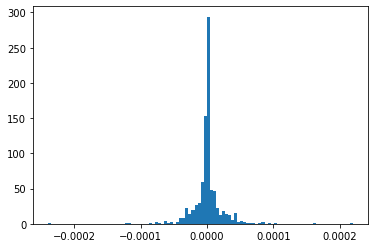

In [ ]:
plt.hist(p_table.loc[:, "time_difference"], bins=100)

In [ ]:
td = np.array(p_table["time_difference"])

stats.ttest_1samp(td, popmean=0, alternative="greater")

Ttest_1sampResult(statistic=0.8154865740159815, pvalue=0.20750890649674703)

### Result
- Em qualquer um dos niveis de significância $0.1$, $0.05$, $0.01$ podemos rejeitar a hipótese nula. O que reforça as nossas supspeitas de que o Code1 demora consistentemente mais que o Code2.


In [ ]:
np.mean(df.loc[:, "time_difference"]), np.std(df.loc[:, "time_difference"])

(7.224199288256224e-07, 2.3131145171466763e-05)

## Hipothesis 3

The linear model we computed from previously collected data is a good model for predicting the runtime of Code 2 for $p=1$ and given $n$.   
Our model is $y(n)=-21.89+1.92n$. Let $t^{(1)}_1, t^{(2)}_1, t^{(3)}_1 \ldots t^{(m)}_1$ be measurements for Code 2 with $n^{(1)}, n^{(2)}, n^{(3)} \ldots n^{(m)}$ exams. Let $e^k = t^k - y(n^k)$ be the model error, $e \sim N (\mu_e,\sigma_e^2)$:

$$ H_0 : \mu_e = 0 $$
$$ H_1 : \mu_e \neq 0 $$

### Read Data

In [ ]:
!gdown --id 1i4N6OlveOylCcglcwfFFYLnhB56Lei8w

Downloading...
From: https://drive.google.com/uc?id=1i4N6OlveOylCcglcwfFFYLnhB56Lei8w
To: /content/measurements_h3.csv
100% 15.5k/15.5k [00:00<00:00, 4.81MB/s]


In [ ]:
df = read_data("measurements_h3.csv")
df.describe()

,Exams,Percentage,Seed1,Seed2,Solution_code2,Time_code2,time,time_log,edges
count,461.000000,461.0,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,7.427332,1.0,1374.895879,31287.264642,7.427332,3.348224,3.348224,-7.024764,29.501085
std,3.359870,0.0,28.308433,28.582060,3.359870,10.599612,10.599612,5.466021,23.941925
min,2.000000,1.0,1326.000000,31236.000000,2.000000,0.000001,0.000001,-13.815511,1.000000
25%,5.000000,1.0,1351.000000,31264.000000,5.000000,0.000008,0.000008,-11.736069,10.000000
50%,7.000000,1.0,1374.000000,31289.000000,7.000000,0.000131,0.000131,-8.940313,21.000000
75%,10.000000,1.0,1400.000000,31312.000000,10.000000,0.040108,0.040108,-3.216179,45.000000
max,13.000000,1.0,1425.000000,31335.000000,13.000000,40.222892,40.222892,3.694436,78.000000


### Test

In [ ]:
df

,Exams,Percentage,Seed1,Seed2,Solution_code2,Time_code2,code,time,time_log,edges
0,3,1.0,1382,31292,3,0.000003,Code2,0.000003,-12.716898,3.0
2,13,1.0,1387,31320,13,40.174277,Code2,40.174277,3.693227,78.0
3,8,1.0,1337,31285,8,0.000742,Code2,0.000742,-7.206161,28.0
4,5,1.0,1421,31246,5,0.000008,Code2,0.000008,-11.736069,10.0
5,13,1.0,1335,31320,13,39.288327,Code2,39.288327,3.670927,78.0
...,...,...,...,...,...,...,...,...,...,...
493,7,1.0,1360,31328,7,0.000123,Code2,0.000123,-9.003326,21.0
494,10,1.0,1355,31258,10,0.039658,Code2,0.039658,-3.227463,45.0
495,5,1.0,1370,31328,5,0.000008,Code2,0.000008,-11.736069,10.0
496,13,1.0,1378,31243,13,39.816393,Code2,39.816393,3.684279,78.0


In [ ]:
df.loc[:, "y(n)"] = (-21.898 + 1.92*df["Exams"])
df.loc[:, "e"] = df["time_log"] - df["y(n)"]

In [ ]:
df.loc[(df["Percentage"] == 1.00) & (df["code"] == "Code2"), "e"]

0      3.421102
2      0.631227
3     -0.668161
4      0.561931
5      0.608927
         ...   
493   -0.545326
494   -0.529463
495    0.561931
496    0.622279
499   -0.179414
Name: e, Length: 461, dtype: float64

In [ ]:
en = df.loc[(df["Percentage"] == 1.00) & (df["code"] == "Code2") & (df["Exams"] <= 14), ["e", "Exams"]]
e = en["e"]
n = en["Exams"]
en

,e,Exams
0,3.421102,3
2,0.631227,13
3,-0.668161,8
4,0.561931,5
5,0.608927,13
...,...,...
493,-0.545326,7
494,-0.529463,10
495,0.561931,5
496,0.622279,13


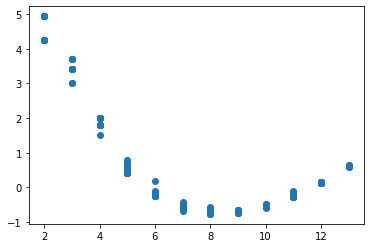

In [ ]:
plt.scatter(n, e)

In [ ]:
stats.ttest_1samp(e, popmean=0)

Ttest_1sampResult(statistic=8.083623839302767, pvalue=5.6053817698591166e-15)

### Result

Em qualquer um dos niveis de significância $0.1$, $0.05$, $0.01$ podemos rejeitar a hipótese nula. No entanto, se permitirmos um nível de significância de 0.15, isso já não se verifica e portanto, para este nível de significância, não podemos dizer que o nosso modelo linear não é um bom modelo para prever o tempo de execução para o Code2 para $p = 1.0$

